In [ ]:
# Install Graphein if necessary
!pip install graphein

# Install pymol if necessary - in this tutorial PyMol is only used for the initial plot. Feel free to skip!
!apt-get install pymol

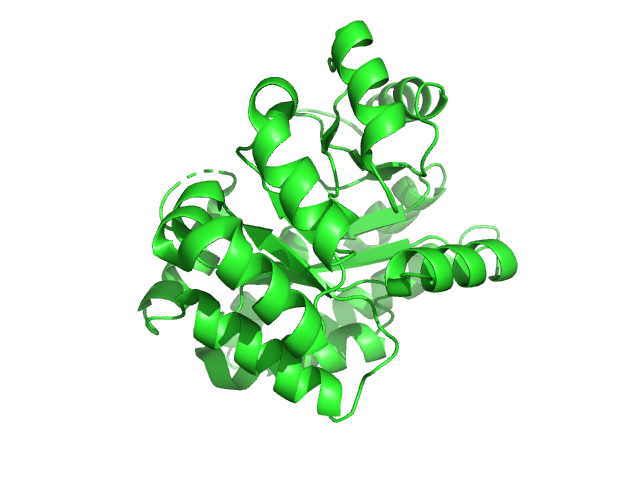

In [3]:
from graphein.utils.pymol import MolViewer
pymol = MolViewer()
pymol.delete("all") # delete all objects from other sessions if necessary.
pymol.fetch("5k9x")
pymol.show_as("cartoon")
pymol.display()

In [4]:
from graphein.protein.config import ProteinGraphConfig

config = ProteinGraphConfig()
config.dict()

<ipython-input-4-427fb779643b>:4: PydanticDeprecatedSince20: The `dict` method is deprecated; use `model_dump` instead. Deprecated in Pydantic V2.0 to be removed in V3.0. See Pydantic V2 Migration Guide at https://errors.pydantic.dev/2.10/migration/
  config.dict()


{'granularity': 'CA',
 'keep_hets': [],
 'insertions': True,
 'alt_locs': 'max_occupancy',
 'pdb_dir': None,
 'verbose': False,
 'exclude_waters': True,
 'deprotonate': False,
 'protein_df_processing_functions': None,
 'edge_construction_functions': [<function graphein.protein.edges.distance.add_peptide_bonds(G: 'nx.Graph') -> 'nx.Graph'>],
 'node_metadata_functions': [<function graphein.protein.features.nodes.amino_acid.meiler_embedding(n: str, d: Dict[str, Any], return_array: bool = False) -> Union[pandas.core.series.Series, numpy.ndarray]>],
 'edge_metadata_functions': None,
 'graph_metadata_functions': None,
 'get_contacts_config': None,
 'dssp_config': None}

In [5]:
from graphein.protein.graphs import construct_graph

g = construct_graph(config=config, pdb_code="5k9x")

Output()

In [6]:
from graphein.protein.visualisation import plotly_protein_structure_graph

p = plotly_protein_structure_graph(
    g,
    colour_edges_by="kind",
    colour_nodes_by="degree",
    label_node_ids=False,
    plot_title="Peptide backbone graph. Nodes coloured by degree.",
    node_size_multiplier=1
    )
p.show()